<a href="https://colab.research.google.com/github/Sharddha-Sharddha/IITMLAssignments/blob/main/Heart_Disease_DecisionTree.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Decision Tree
- a flowchart
- that asks Yes/No or If/Else questions
- until it reaches an answer(prediction)
- uses CART algorithm because it works with Gini Impurity to split nodes.
- Gini is slightly faster
- Gini usually creates similar or better splits compared to info gain.

##Gini Impurity
- Gini tells how impure a node is. Lower Gini = better split

##Information Gain
- How much uncertainity was removed after the split.
- During fit(), the model tries many questions and picks the one with the highest info gain.

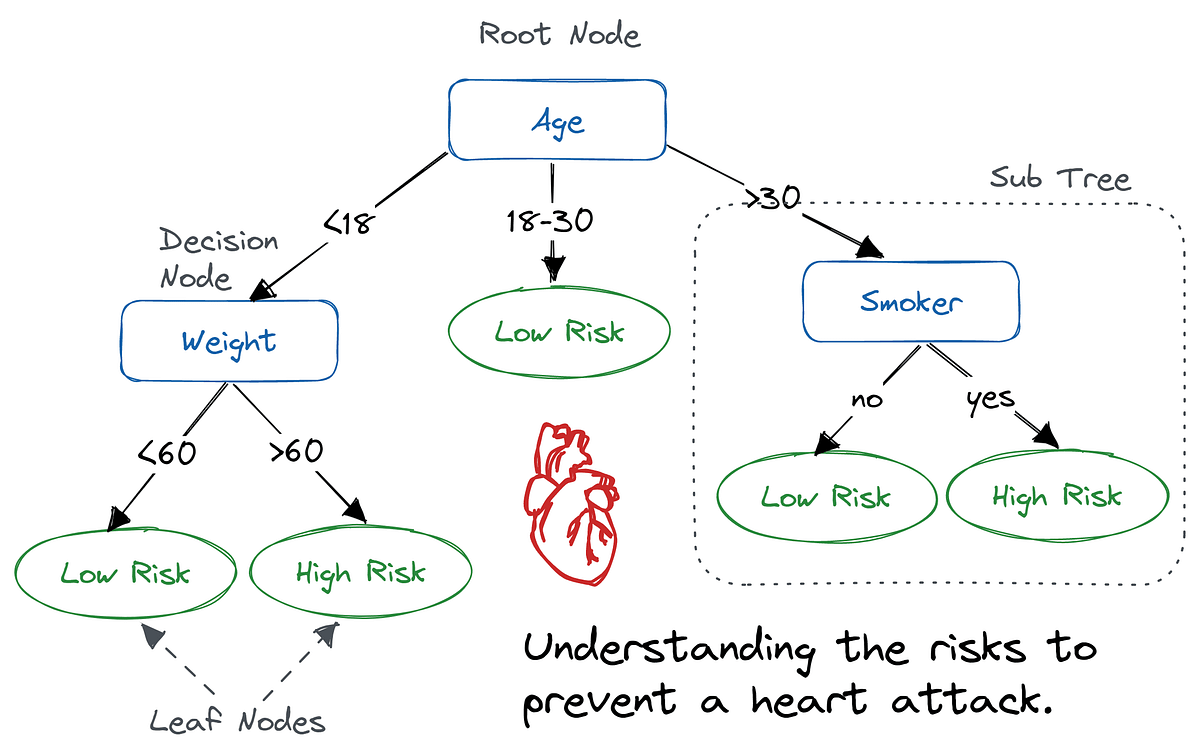

In [ ]:
# Dataset link: https://drive.google.com/file/d/10b67wvQs-acIZXwlJB4Gbk3BpvMoyN90/view?usp=sharing

age: the age of the patient in years.

sex: the sex of the patient (1 = male, 0 = female).

cp: the type of chest pain the patient experienced (1 = typical angina, 2 = atypical angina, 3 = non-anginal pain, 4 = asymptomatic).

trestbps: the resting blood pressure of the patient in mm Hg.

chol: the serum cholesterol level of the patient in mg/dl.

fbs: the fasting blood sugar level of the patient, measured in mg/dl (1 = high, 0 = low).

restecg: the resting electrocardiographic results of the patient (0 = normal, 1 = ST-T wave abnormality, 2 = left ventricular hypertrophy).

(Resting electrocardiographic (ECG or EKG) is a non-invasive diagnostic test that records the electrical activity of the heart while the patient is at rest. The test is performed using an electrocardiogram machine, which records the electrical signals produced by the heart through electrodes placed on the chest, arms, and legs.)

thalach: the maximum heart rate achieved by the patient during exercise. exang: whether the patient experienced exercise-induced angina (1 = yes, 0 = no).

oldpeak: the ST depression induced by exercise relative to rest. slope: the slope of the ST segment during peak exercise (1 = upsloping, 2 = flat, 3 = downsloping).

(ST depression induced by exercise relative to rest Oldpeak, also known as ST depression, is a common parameter measured during an exercise stress test to evaluate the presence and severity of coronary artery disease. It represents the amount of ST segment depression that occurs on an electrocardiogram (ECG) during exercise compared to rest.)

ca: the number of major vessels colored by fluoroscopy (0-3).

(he number of major vessels (0-3) colored by fluoroscopy is a parameter that is used to assess the severity of coronary artery disease (CAD) in patients who undergo coronary angiography)

thal: the type of thallium scan performed on the patient (1 = fixed defect, 2 = reversible defect, 3 = normal).

target: the presence of heart disease in the patient (0 = no disease, 1 = disease present).

In [ ]:
#import libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
df=pd.read_csv('/content/heart.csv')
df

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,57,0,0,140,241,0,1,123,1,0.2,1,0,3,0
299,45,1,3,110,264,0,1,132,0,1.2,1,0,3,0
300,68,1,0,144,193,1,1,141,0,3.4,1,2,3,0
301,57,1,0,130,131,0,1,115,1,1.2,1,1,3,0


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trestbps  303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalach   303 non-null    int64  
 8   exang     303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slope     303 non-null    int64  
 11  ca        303 non-null    int64  
 12  thal      303 non-null    int64  
 13  target    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


In [ ]:
#EDA
# 1. null values

In [ ]:
df.isnull().sum()

,0
age,0
sex,0
cp,0
trestbps,0
chol,0
fbs,0
restecg,0
thalach,0
exang,0
oldpeak,0


In [ ]:
#2. duplicates

df.duplicated().sum()

np.int64(1)

In [ ]:
df.drop_duplicates(inplace=True)

In [ ]:
df.duplicated().sum()

np.int64(0)

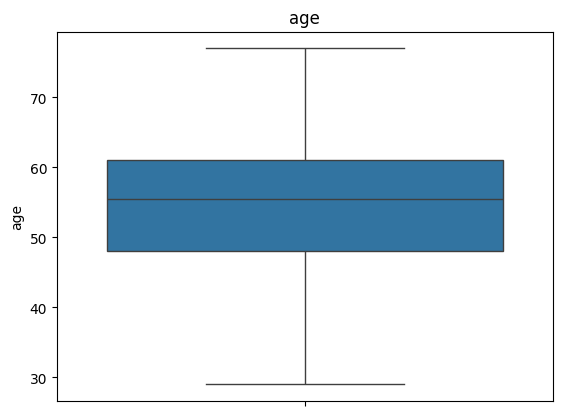

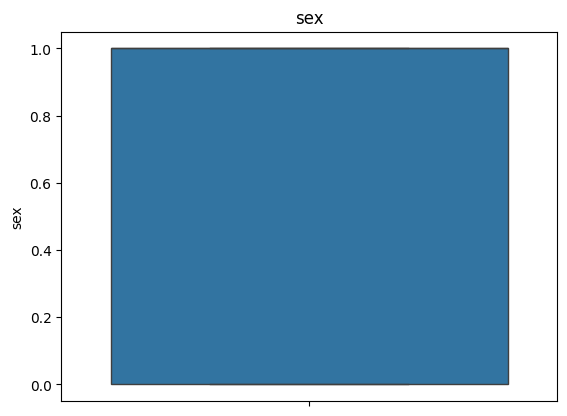

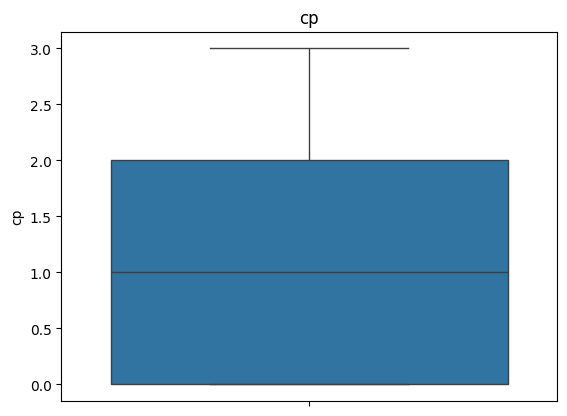

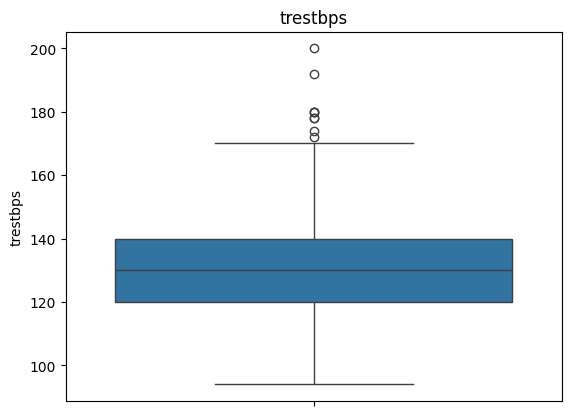

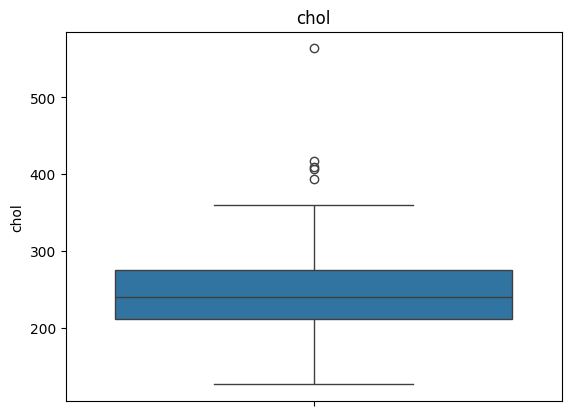

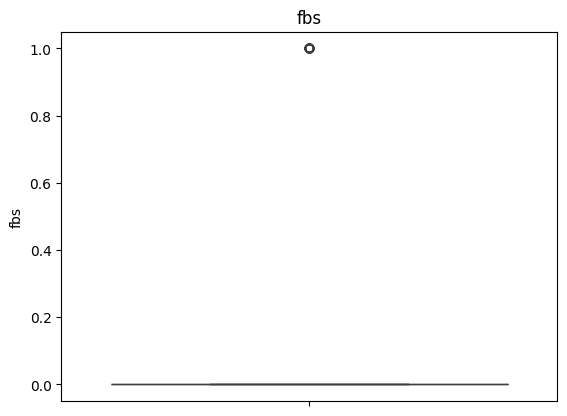

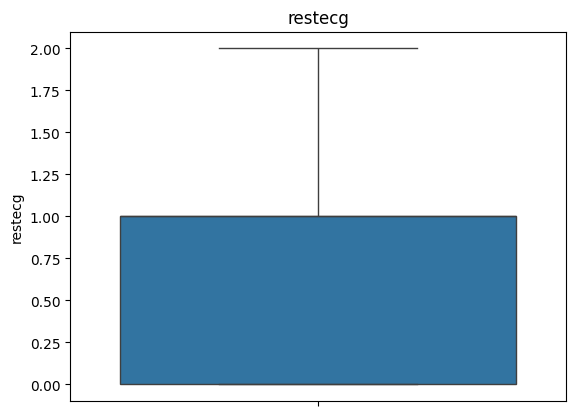

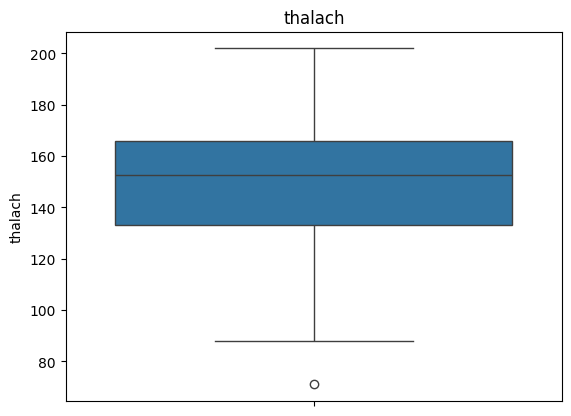

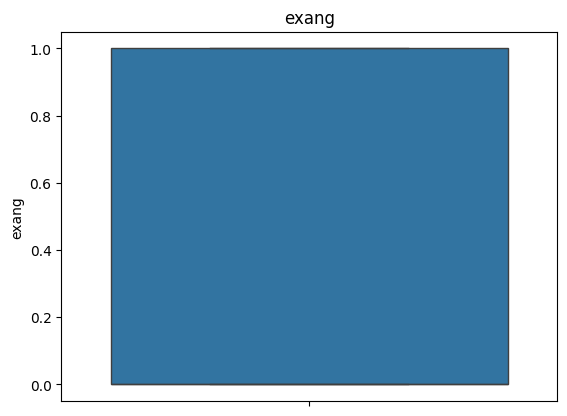

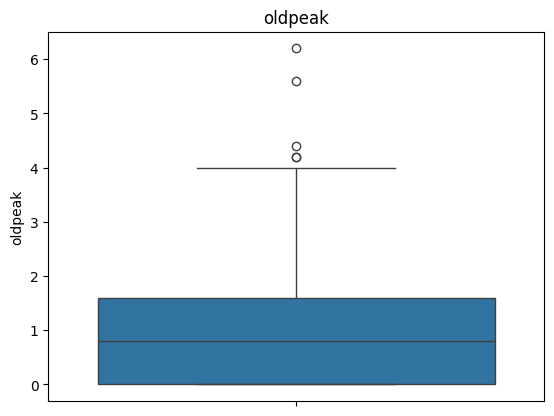

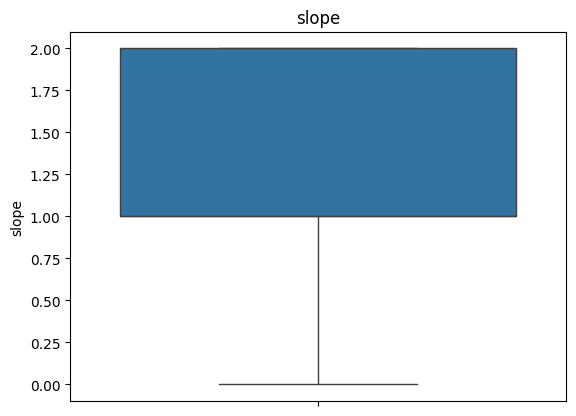

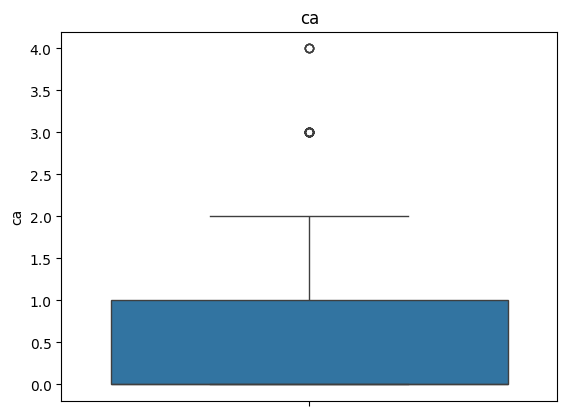

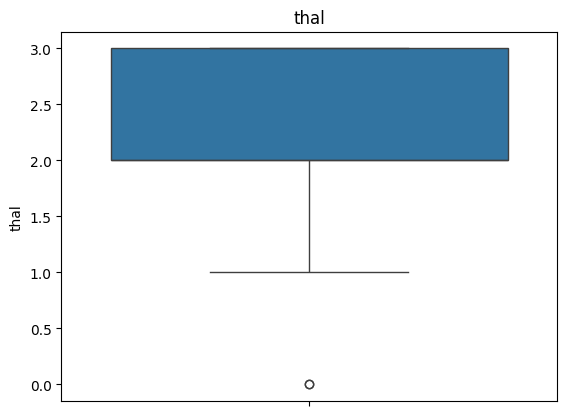

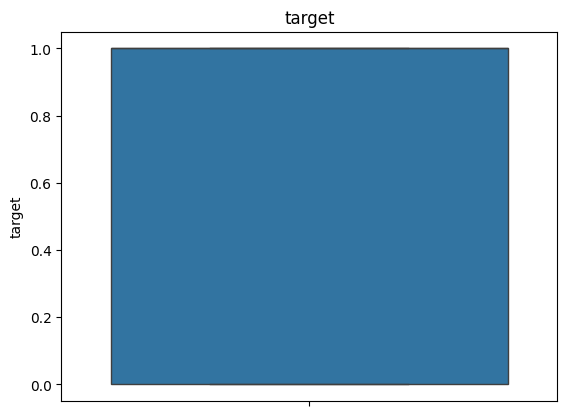

In [ ]:
for col in df.columns:
  sns.boxplot(df[col])
  plt.title(col)
  plt.show()

In [ ]:
#Model Building
#1. splitting the data into feature(x) and target(y)

In [ ]:
x=df.iloc[:,:-1] #all rows and all columns except last one
y=df['target']

In [ ]:
x #Feature/independent columns

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,57,0,0,140,241,0,1,123,1,0.2,1,0,3
299,45,1,3,110,264,0,1,132,0,1.2,1,0,3
300,68,1,0,144,193,1,1,141,0,3.4,1,2,3
301,57,1,0,130,131,0,1,115,1,1.2,1,1,3


In [ ]:
y #Target/Dependent column

,target
0,1
1,1
2,1
3,1
4,1
...,...
298,0
299,0
300,0
301,0


In [ ]:
#2. splitting the data into training and testing sets

from sklearn.model_selection import train_test_split

x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=,stratify = y)

In [ ]:
x_train

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
74,43,0,2,122,213,0,1,165,0,0.2,1,0,2
153,66,0,2,146,278,0,0,152,0,0.0,1,1,2
64,58,1,2,140,211,1,0,165,0,0.0,2,0,2
296,63,0,0,124,197,0,1,136,1,0.0,1,0,2
288,57,1,0,110,335,0,1,143,1,3.0,1,1,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...
252,62,0,0,138,294,1,1,106,0,1.9,1,3,2
193,60,1,0,145,282,0,0,142,1,2.8,1,2,3
117,56,1,3,120,193,0,0,162,0,1.9,1,0,3
47,47,1,2,138,257,0,0,156,0,0.0,2,0,2


In [ ]:
x_test

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
226,62,1,1,120,281,0,0,103,0,1.4,1,1,3
152,64,1,3,170,227,0,0,155,0,0.6,1,0,3
229,64,1,2,125,309,0,1,131,1,1.8,1,0,3
202,58,1,0,150,270,0,0,111,1,0.8,2,0,3
52,62,1,2,130,231,0,1,146,0,1.8,1,3,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...
146,44,0,2,118,242,0,1,149,0,0.3,1,1,2
302,57,0,1,130,236,0,0,174,0,0.0,1,1,2
26,59,1,2,150,212,1,1,157,0,1.6,2,0,2
108,50,0,1,120,244,0,1,162,0,1.1,2,0,2


In [ ]:
#3. Training the model

from sklearn.tree import DecisionTreeClassifier

model=DecisionTreeClassifier(random_state=42)

model.fit(x_train,y_train)

DecisionTreeClassifier(random_state=42)

In [ ]:
#4. Prediction

y_pred=model.predict(x_test)

In [ ]:
y_pred

array([0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 1, 1, 1, 0, 1, 0, 0, 1, 0,
       0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1, 0, 1, 1, 0, 0, 1, 0, 1, 0,
       0, 1, 1, 1, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1])

In [ ]:
#5. Evaluate (Comparing y_test(Actual answers) with y_pred(Predicted answers))

from sklearn.metrics import *

accuracy_score(y_pred,y_test)*100

78.68852459016394

In [ ]:
#HYPERPARAMTER TUNING

In [ ]:
depth=[1,2,3,4,5,6,7,8,9,10]

In [ ]:
for max_d in depth:
  model=DecisionTreeClassifier(max_depth=max_d,random_state=42)
  model.fit(x_train,y_train)
  y_pred=model.predict(x_test)
  acc=accuracy_score(y_test,y_pred)
  print(f"Accuracy of the model for max depth {max_d} is {acc}")

Accuracy of the model for max depth 1 is 0.6721311475409836
Accuracy of the model for max depth 2 is 0.819672131147541
Accuracy of the model for max depth 3 is 0.7704918032786885
Accuracy of the model for max depth 4 is 0.8360655737704918
Accuracy of the model for max depth 5 is 0.819672131147541
Accuracy of the model for max depth 6 is 0.7540983606557377
Accuracy of the model for max depth 7 is 0.7540983606557377
Accuracy of the model for max depth 8 is 0.7540983606557377
Accuracy of the model for max depth 9 is 0.7868852459016393
Accuracy of the model for max depth 10 is 0.7868852459016393


In [ ]:
final_model=DecisionTreeClassifier(max_depth=4, random_state=42)
final_model.fit(x_train,y_train)
y_pred=final_model.predict(x_test)
acc=accuracy_score(y_test,y_pred)
acc*100 #percent

83.60655737704919

In [ ]:
#final_model.tree_.feature - gives and array showing which feature is used at each node
features=final_model.tree_.feature

for i,f in enumerate(features): #i=feature index, f=column name
  if f!=-1: #f!=-1 : leaf node can't be split
    print(f"Node{i} uses feature:{x_train.columns[f]}") #x_train.columns[f]: converts f into actual feature name to print result

Node0 uses feature:ca
Node1 uses feature:thal
Node2 uses feature:oldpeak
Node3 uses feature:thalach
Node4 uses feature:ca
Node5 uses feature:ca
Node6 uses feature:age
Node7 uses feature:ca
Node8 uses feature:ca
Node9 uses feature:age
Node10 uses feature:chol
Node11 uses feature:ca
Node12 uses feature:ca
Node13 uses feature:thalach
Node14 uses feature:ca
Node15 uses feature:ca
Node16 uses feature:cp
Node17 uses feature:age
Node18 uses feature:ca
Node19 uses feature:restecg
Node20 uses feature:ca
Node21 uses feature:ca
Node22 uses feature:oldpeak
Node23 uses feature:thalach
Node24 uses feature:ca
Node25 uses feature:ca
Node26 uses feature:ca


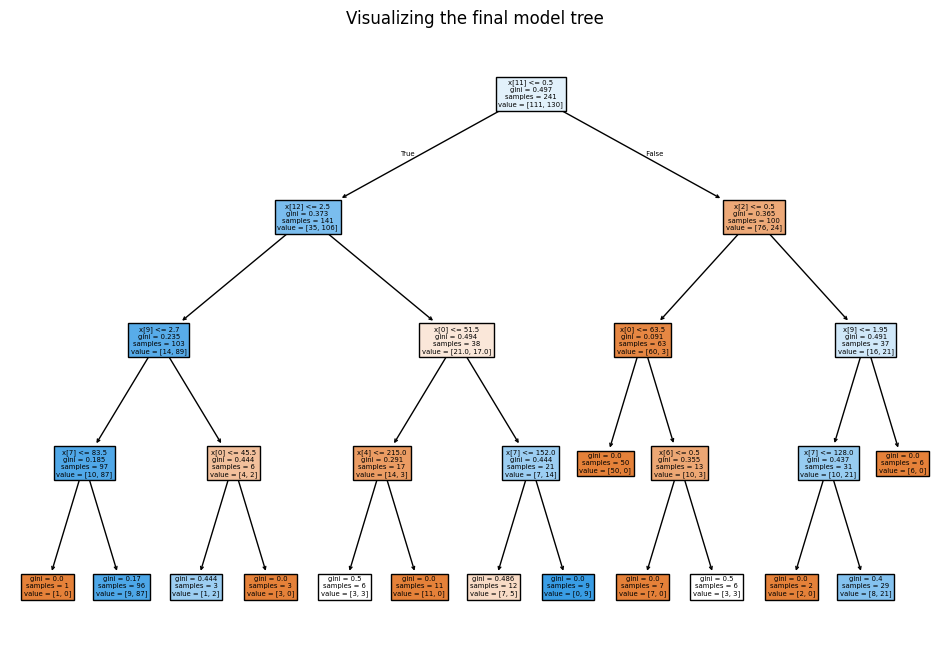

In [ ]:
from sklearn.tree import plot_tree

plt.figure(figsize=(12,8))
plot_tree(final_model,filled=True)
plt.title("Visualizing the final model tree")
plt.show()

1. **first line:** x[2]<=0.5 -> splitting condition; each node checks one feature and splits data into 2 groups, which feature and threshold(like 0.5)
are chosen automatically by the algorithm to maximize purity

2. **second line:** gini=0.49 -> gini entropy of that node(how mixed the classes are)
   - **Gini impurity**: 0=node is pure, close to 0.5(mixed/impure)

3. **third line:** samples=211 -> node has 211 data points(or rows) from the dataset

4. **fourth line:** value=[96,115] -> how many samples belong to each class in this node
    - 96 belongs to class 0
    - 115 belong to class 1